# **ASSIGNMENT-6: MLR(Multiple Linear Regression)**

# **Objective:** Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.shape

(1436, 11)

In [4]:
df.size

15796

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


# **Task-1:** Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [6]:
#Missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
#Duplicates
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
target=df[['Price']]
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1430,7500
1431,10845
1432,8500
1433,7250


In [11]:
features=df.drop(columns='Price')
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1430,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,70,16916,Petrol,86,0,1300,3,4,5,1015


# Statistical summary

In [12]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


# Visualizations

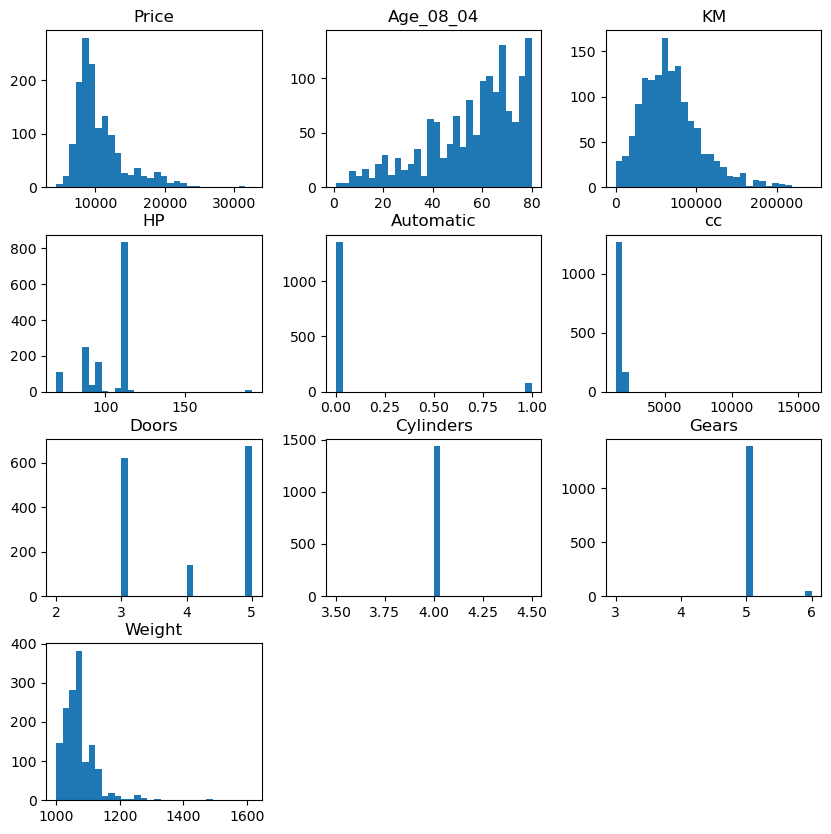

In [13]:
# Histogram
df.hist(figsize=(10,10),bins=30,grid=False)
plt.show()

<Axes: >

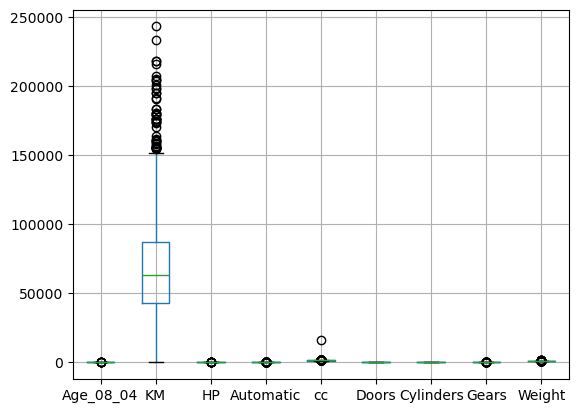

In [14]:
# Outlier Detection
features.boxplot()

In [15]:
# Outlier Capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in features.select_dtypes(['int','float']).columns:
    outlier_capping(features,col)

<Axes: >

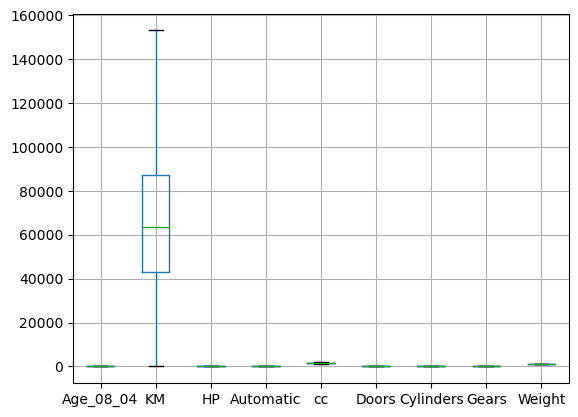

In [16]:
features.boxplot()

In [17]:
# Labeling of categorical columns
from sklearn.preprocessing import OneHotEncoder
one_hot_enc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
df1=pd.DataFrame(one_hot_enc.fit_transform(df[['Fuel_Type']]),columns=one_hot_enc.get_feature_names_out(['Fuel_Type']),index=df.index)

In [18]:
df1

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1430,0.0,0.0,1.0
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0


In [19]:
df1=df.join(df1)
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025,0.0,0.0,1.0
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015,0.0,0.0,1.0


In [20]:
df1=df1.drop(columns=(['Fuel_Type']))
df1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,13750,23,72937,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,13950,24,41711,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,14950,26,48000,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,13750,30,38500,90,0,2000,3,4,5,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,4,5,1025,0.0,0.0,1.0
1431,10845,72,19000,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1432,8500,71,17016,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1433,7250,70,16916,86,0,1300,3,4,5,1015,0.0,0.0,1.0


In [21]:
new_target=df1[['Price']]
new_target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1430,7500
1431,10845
1432,8500
1433,7250


In [22]:
new_features=df1.drop(columns=['Price'])
new_features

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,23,72937,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,24,41711,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,26,48000,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,30,38500,90,0,2000,3,4,5,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,0,1300,3,4,5,1025,0.0,0.0,1.0
1431,72,19000,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1432,71,17016,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1433,70,16916,86,0,1300,3,4,5,1015,0.0,0.0,1.0


<Axes: >

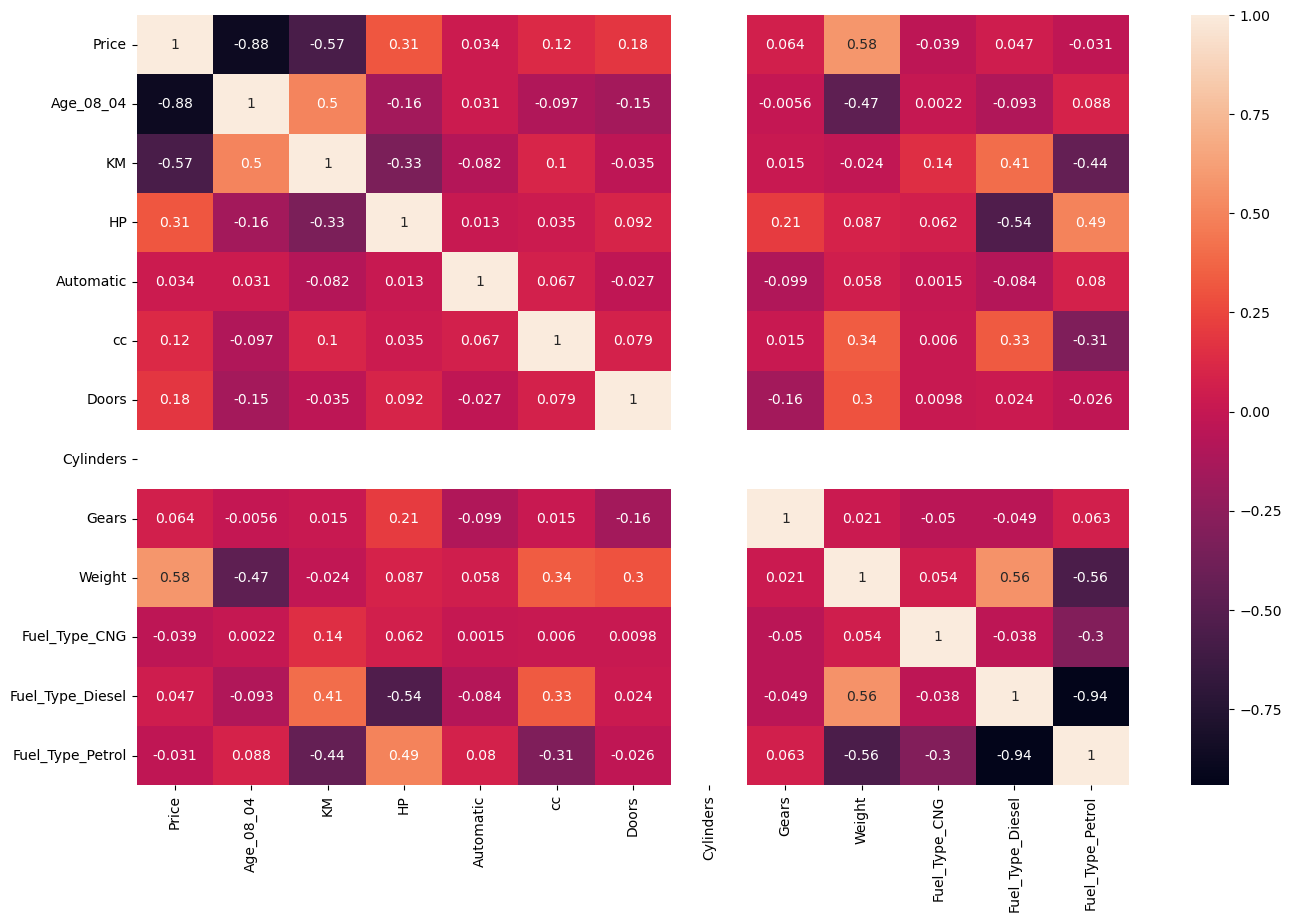

In [23]:
# Correlation Matrix
plt.figure(figsize=(16,10))
corr=df1.corr()
sns.heatmap(corr,annot=True)

<Axes: >

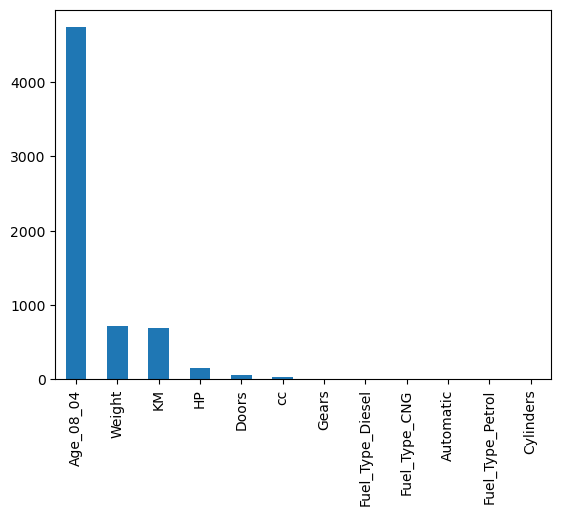

In [24]:
#Feature Selection
f_reg=f_regression(new_features,new_target)
pd.Series(f_reg[0],index=new_features.columns).sort_values(ascending=False).plot(kind='bar')

In [25]:
# If our model accuracy is less, then we can drop the features which have less relation with the target as shown in the above fig.

In [26]:
# Checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=new_features.columns
vif['VIF']=[variance_inflation_factor(new_features.values,i) for i in range(len(new_features.columns))]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
11,Fuel_Type_Petrol,inf
9,Fuel_Type_CNG,inf
10,Fuel_Type_Diesel,inf
8,Weight,3.254342
2,HP,2.300692
1,KM,2.002649
0,Age_08_04,1.911952
4,cc,1.223606
5,Doors,1.217072
7,Gears,1.117554


In [27]:
df1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,13750,23,72937,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,13950,24,41711,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,14950,26,48000,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,13750,30,38500,90,0,2000,3,4,5,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,4,5,1025,0.0,0.0,1.0
1431,10845,72,19000,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1432,8500,71,17016,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1433,7250,70,16916,86,0,1300,3,4,5,1015,0.0,0.0,1.0


# **Task-2:** Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [28]:
# Splitting the data

In [29]:
x_train,x_test,y_train,y_test=train_test_split(new_features,new_target,train_size=0.8,random_state=100)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 12)
(287, 12)
(1148, 1)
(287, 1)


In [31]:
# Scaling

In [32]:
std_slr=StandardScaler()

In [33]:
x_train[['Age_08_04','KM','HP','cc','Weight']]=std_slr.fit_transform(x_train[['Age_08_04','KM','HP','cc','Weight']])
x_test[['Age_08_04','KM','HP','cc','Weight']]=std_slr.transform(x_test[['Age_08_04','KM','HP','cc','Weight']])

# **Task-3:** Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()

In [36]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [37]:
# Intercept
model.intercept_

array([6670.50142835])

In [38]:
# Coefficient
model.coef_

array([[-2.31740169e+03, -6.68215595e+02,  4.21534984e+02,
         4.12861770e+02, -1.88900895e+01,  8.59701966e+00,
         2.16004992e-12,  7.25321820e+02,  1.00621687e+03,
        -5.10245395e+02,  1.16288204e+02,  3.93957191e+02]])

# **Task-4:** Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [39]:
# Training validation
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
print('r2_score=',r2_score(y_train,y_pred))
print('Mean Squared Error=',np.sqrt(mean_squared_error(y_train,y_pred)))
print('Mean Absolute Error',mean_absolute_error(y_train,y_pred))

r2_score= 0.8626546507702081
Mean Squared Error= 1350.7237564618251
Mean Absolute Error 998.2304492142243


In [40]:
#Testing validation
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('r2_score=',r2_score(y_test,y_pred))
print('Mean Squared Error=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

r2_score= 0.8666897113793465
Mean Squared Error= 1261.3259886825222
Mean Absolute Error 932.8458255924652


# **Task-5:** Apply Lasso and Ridge methods on the model.

# Lasso Model

In [41]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [42]:
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

#Hyper parameter Tuning using Grid search

In [43]:
params=dict(alpha=range(1,11))
grid_search=GridSearchCV(estimator=lasso,param_grid=params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(), param_grid={'alpha': range(1, 11)})

In [44]:
grid_search.best_params_

{'alpha': 10}

In [45]:
lasso=Lasso(alpha=10)
lasso.fit(x_train,y_train)

Lasso(alpha=10)

In [46]:
# r2 score
y_pred_lasso=lasso.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.865442569299739

# Ridge Model

In [47]:
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

#Hyper parameter Tuning using Grid search

In [48]:
params1=dict(alpha=range(1,11))
grid_search1=GridSearchCV(estimator=ridge,param_grid=params1)
grid_search1.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': range(1, 11)})

In [49]:
grid_search1.best_params_

{'alpha': 10}

In [50]:
ridge=Ridge(alpha=10)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.8664489980497943

# **Interview Questions**

# 1.What is Normalization & Standardization and how is it helpful?

Normalization:-
Normalization rescales numerical data into a fixed range, usually 0 to 1. It is useful when the minimum and maximum values of features are known and there are no extreme outliers.

X(norm)=(X-Xmin)/(Xmax-Xmin)

Standardization:-Standardization transforms data so that it has a mean of 0 and a standard deviation of 1. It is commonly performed using StandardScaler and is preferred for regression models.

X(std)=(X-μ)/σ

where, 
     μ defines the mean of the feature and,
     σ is the standard deviation  

# 2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity in multiple linear regression can be handled by removing highly correlated variables, using Variance Inflation Factor (VIF) to identify problematic features, applying feature selection techniques, using Principal Component Analysis (PCA), or applying regularization methods such as Ridge and Lasso regression.

#                                                           **THE END**